### Course Name and Number: CSC 578 Neural Network and Deep Learning - SEC 701
### Student Name: Mai Ngo
### Final Project: Recurrent Neural Network
### Date: 11/21/2023

In [1]:
#Mount my Google Drive
from google.colab import drive
drive.mount("/content/drive")
import os
directory = '/content/drive/My Drive/Final'
os.chdir(directory)

#Ensure the files are there (in the folder)
!pwd

Mounted at /content/drive
/content/drive/My Drive/Final


In [2]:
#TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Embedding, Conv1D, MaxPooling2D, Flatten
from keras import optimizers
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler

### **Read dataset as pandas data frame.**

In [3]:
trainData_original = pd.read_csv('lsst-train.csv')
print(f'Original training data: Row - {trainData_original.shape[0]} | Column - {trainData_original.shape[1]}')

Original training data: Row - 3356 | Column - 217


In [4]:
trainData_original.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,2.57770,-1.18830,-4.98950,-6.4301,-4.6503,-1.02450,1.90420,2.48850,1.360500,0.90286,...,22.36600,-24.7480,-34.21500,7.7464,-5.8332,-0.71757,8.16160,-29.6940,-27.5700,c-90
1,6.67580,22.54300,44.02700,66.9610,86.0820,96.80400,96.76000,86.49400,69.094000,48.97100,...,19.26700,28.5110,0.97578,-28.0270,-18.0720,-4.00020,-43.07500,-4.7283,-43.0070,c-15
2,0.37554,-3.10860,-0.26009,3.2281,-1.9951,0.12797,0.25844,-0.25394,-0.091828,2.41440,...,-4.02610,14.5270,50.00500,-13.8860,3.3589,5.00450,-0.47256,-2.7713,1.9379,c-42
3,0.51852,0.12078,1.53240,5.5783,11.5340,17.01300,18.97100,15.38700,6.685500,-4.07800,...,23.24700,31.9850,26.62100,-12.2560,3.4805,23.80500,-32.36400,-15.1610,-14.4500,c-16
4,1.47150,1.44510,2.91330,1.0015,-1.2503,1.55160,1.73170,0.47796,0.539860,-1.71690,...,-0.18477,3.8533,-5.80000,1.4909,2.7581,-3.16650,-0.30058,6.6334,7.3427,c-67


In [5]:
testData = pd.read_csv('lsst-test.csv')
print(f'Testing data: Row - {testData.shape[0]} | Column - {testData.shape[1]}')

Testing data: Row - 1439 | Column - 216


In [6]:
testData.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-27,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36
0,25.575000,25.5650,6.8052,-26.012,-55.1290,-62.0750,-43.3400,-14.26500,4.03600,2.8128,...,114.9600,116.3700,69.0540,11.8250,29.5960,55.14500,1.0701,-31.4420,20.914,39.9590
1,2.432400,10.4920,16.6900,14.609,3.8112,-8.9224,-15.1370,-11.82400,-3.60240,2.0792,...,16.7950,3.3646,5.7902,52.7540,-19.5210,-9.35210,63.4920,-17.8800,-40.938,6.2865
2,-0.166710,-1.0756,-0.8531,1.626,-1.8959,2.4717,-0.2629,-1.43750,0.89766,-2.4570,...,-3.3971,-8.2973,8.8071,-3.6586,-6.4716,0.87079,2.6530,2.2138,-1.323,-2.1806
3,-4.800300,-3.5558,-5.2497,-10.011,-10.9800,-3.5785,4.9622,2.28200,-11.07200,-17.1180,...,2.9662,-6.1161,-34.6170,-96.5080,-94.9050,-8.84960,48.7190,-15.2810,-15.786,34.8360
4,-0.048579,-11.9320,-25.6890,-35.259,-36.0600,-27.6460,-13.9240,-0.79703,7.31190,9.8219,...,63.1690,64.7760,53.0120,-83.1160,-50.6480,79.74300,-16.5700,74.2040,72.036,100.2200


### **Subset training data without 'target column'.**

In [7]:
trainData = trainData_original.drop(columns=['target'])
print(f'Training data: Row - {trainData.shape[0]} | Column - {trainData.shape[1]}')

Training data: Row - 3356 | Column - 216


### **Process 'target' column in trainData: Convert to integers.**
#### Tagret now will be in separate column.

Plot the distribution of 'target' variable --> There is **DATA IMBALANCE** issue. --> Will circle back to this below.

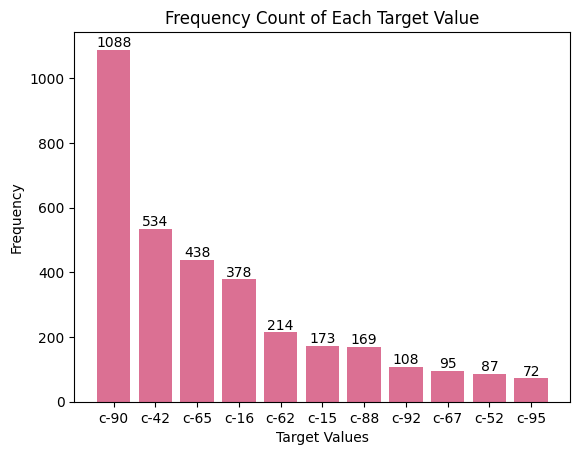

In [8]:
#Get unique target values and associated count.
target_uniqueCounts = trainData_original['target'].value_counts()
plt.bar(target_uniqueCounts.index, target_uniqueCounts.values, color='palevioletred')

for i, v in enumerate(target_uniqueCounts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Frequency Count of Each Target Value')
plt.show()

In [9]:
target = trainData_original['target']
#Get unique target values.
uniqueTargets = trainData_original['target'].unique()
#Sort unique values and create a mapping. For example, 'c-15' --> 0, 'c-16' --> 1, and so on.
targetInteger = {target: index for index, target in enumerate(sorted(uniqueTargets))}
print(f'Target original values - converted integers: {targetInteger}')

Target original values - converted integers: {'c-15': 0, 'c-16': 1, 'c-42': 2, 'c-52': 3, 'c-62': 4, 'c-65': 5, 'c-67': 6, 'c-88': 7, 'c-90': 8, 'c-92': 9, 'c-95': 10}


In [10]:
#Replace with new integer values.
target = target.map(targetInteger)
#Reshape the new integer-target column (to (-1, 1)) to ensure a numpy column vector/array.
target = target.values.reshape(-1,1)
print(f'Shape of target columns: {target.shape}')
print('Interger target column:')
print(target)

Shape of target columns: (3356, 1)
Interger target column:
[[8]
 [0]
 [2]
 ...
 [4]
 [2]
 [8]]


### **Reshape the predictors (216 X variables).**
### (-1, timesteps, features) | (-1, 6, 36) given 6 for timesteps, 36 for features.

In [11]:
timeSteps = 6
features = 36
#Get Numpy representation of the training data.
X = trainData.values
#Reshape the predictors.
X = X.reshape(-1, timeSteps, features)
print(f'Training data - after reshape: {X.shape}')
print(f'First row/observation shape: {X[0].shape}')
print('First row/observation after reshape:')
print(X[0])

Training data - after reshape: (3356, 6, 36)
First row/observation shape: (6, 36)
First row/observation after reshape:
[[ 2.5777e+00 -1.1883e+00 -4.9895e+00 -6.4301e+00 -4.6503e+00 -1.0245e+00
   1.9042e+00  2.4885e+00  1.3605e+00  9.0286e-01  3.1419e+00  7.7968e+00
   1.2209e+01  1.3355e+01  1.0328e+01  5.1675e+00  1.2139e+00  3.0111e-01
   1.1921e+00  7.1124e-01 -3.2709e+00 -9.5445e+00 -1.4085e+01 -1.3204e+01
  -6.8397e+00  8.3864e-01  4.2475e+00  6.0407e-01 -7.7566e+00 -1.4862e+01
  -1.5345e+01 -8.2771e+00  2.2537e+00  1.0123e+01  1.1388e+01  6.6385e+00]
 [-1.6783e+00 -3.4445e+00 -3.0357e+00  2.8849e-02  3.2445e+00  3.0960e+00
  -1.0083e+00 -4.9157e+00 -2.6612e+00  7.8961e+00  2.2082e+01  3.1429e+01
   3.0398e+01  2.0788e+01  9.8657e+00  4.1723e+00  4.7205e+00  7.4999e+00
   7.9778e+00  4.9950e+00  8.7241e-01 -1.4524e+00 -1.0554e+00  7.2462e-01
   1.9072e+00  1.4553e+00 -3.5752e-01 -2.5367e+00 -4.0769e+00 -4.3687e+00
  -3.3639e+00 -1.5809e+00  1.3014e-01  1.0636e+00  1.0626e+00  5.2

###Cross check to make sure I am doing reshaping right. After reshaping:


*   Number of rows stay the same: 3356
*   Each row now is 2D array with dimensions (timeSteps = 6, features = 36).



###Reshaped train data - 11th observation, first feature.

In [12]:
print('11th row/observation - 1st feature after reshape:')
print(X[10][0])

11th row/observation - 1st feature after reshape:
[ 35.156    37.916    22.365    -2.7425  -19.273   -15.165     4.1297
  21.102    23.534    15.606    10.884    15.96     23.544    21.575
   7.0974  -10.497   -19.116   -15.278    -5.798     0.3977    0.90133
   0.17239   2.4424    6.2794    7.5038    6.1431    7.3349   13.658
  19.896    18.6      10.592     5.6807   10.812    20.476    22.537
  12.863  ]


###Original train data - 11th observation, first feature.

In [13]:
sample_11th = trainData.iloc[10][:36]
sample_11th = pd.DataFrame(sample_11th).transpose()
print('11th row/observation - 1st feature before reshape:')
sample_11th

11th row/observation - 1st feature before reshape:


,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-1-27,f-1-28,f-1-29,f-1-30,f-1-31,f-1-32,f-1-33,f-1-34,f-1-35,f-1-36
10,35.156,37.916,22.365,-2.7425,-19.273,-15.165,4.1297,21.102,23.534,15.606,...,7.3349,13.658,19.896,18.6,10.592,5.6807,10.812,20.476,22.537,12.863


###**Split the training data (with class imbalance): Train and Validation Sets.**
####Given time series data, i.e., the sequence of rows is important. Splitting will be executed on row index, top down order.



In [14]:
#80% for training, 20% for validation.
trainSize = 0.8
trainIndex = int(len(X) * trainSize)

xTrain, xValidation = X[:trainIndex], X[trainIndex:]
targetTrain, targetValidation = target[:trainIndex], target[trainIndex:]

print('After split:')
print("X Train shape:", xTrain.shape)
print("Target Train shape:", xValidation.shape)
print("X Validation shape:", targetTrain.shape)
print("Target Validation shape:", targetValidation.shape)

After split:
X Train shape: (2684, 6, 36)
Target Train shape: (672, 6, 36)
X Validation shape: (2684, 1)
Target Validation shape: (672, 1)


####Check if all 10 'target' classes exist in both train and validation sets, after split. Somewhat same frequency dsitribution as well.


In [15]:
#Get unique 'target' value count of each set.
class_distributionTrain = pd.Series(targetTrain.flatten()).value_counts()
class_distributionVal = pd.Series(targetValidation.flatten()).value_counts()

#Calculate percentage for each 'target' class within training and validation sets.
percTrain = (class_distributionTrain / class_distributionTrain.sum()) * 100
percVal = (class_distributionVal / class_distributionVal.sum()) * 100

class_distributionTrain_table = pd.DataFrame({
    'Class': percTrain.index,
    '% in Training Set': percTrain.values})

class_distributionVal_table = pd.DataFrame({
    'Class': percVal.index,
    '% in Validation Set': percVal.values})

class_distributionTrain_table = class_distributionTrain_table.set_index('Class').T.round(3).astype(float)
class_distributionVal_table = class_distributionVal_table.set_index('Class').T.round(3).astype(float)

print("Class Distribution in Training Set:")
class_distributionTrain_table

Class Distribution in Training Set:


Class,8,2,5,1,4,0,7,9,6,3,10
% in Training Set,32.303,16.244,12.891,10.991,6.148,5.365,5.328,3.204,2.906,2.571,2.049


In [16]:
print("\nClass Distribution in Validation Set:")
class_distributionVal_table


Class Distribution in Validation Set:


Class,8,2,5,1,4,0,7,9,3,6,10
% in Validation Set,32.887,14.583,13.69,12.351,7.292,4.315,3.869,3.274,2.679,2.53,2.53


###**Further/Advanced Development: Data balancing.**
####Apply Downsampling and Upweighting - Google Machine Learning reference.

**Step 1: Downsample the majority classes.**

From 'target' class distribution plot above, class 'c-90' has the most: 1088 counts, while class 'c-95' has the least of 72 counts. That is roughly 1 of 'c-95' to 15 of 'c-90'. Same logic apply to other classes in between. Given this, for 'c-90', apply downsampling by a factor of 10 to improve the balance now, 1 of 'c-95' to approximately 1.5 of 'c-90'. We will apply the same downsampling factor logic to other classes as well. Expecting afterward, each class has around 100 observations

In [17]:
downsamplingFactors = {'c-90': 10, 'c-42': 5, 'c-65': 4, 'c-16': 3, 'c-62': 2, 'c-15': 2, 'c-88': 2, 'c-92': 1, 'c-67': 1, 'c-52': 1, 'c-95': 1}
downsampledData_original = pd.DataFrame()
for targetClass, factor in downsamplingFactors.items():
    #Filter instances belonging to the current class.
    classInstances = trainData_original[trainData_original['target'] == targetClass]

    #Calculate the number of instances to keep after downsampling
    numInstances_to_keep = len(classInstances) // factor
    print(f'Target class: {targetClass} | Number of kept instance: {numInstances_to_keep}')

    # Randomly sample instances from the current class
    downsampledInstances = classInstances.sample(n=numInstances_to_keep, random_state=1997)

    # Append the downsampled instances to the new DataFrame
    downsampledData_original = pd.concat([downsampledData_original, downsampledInstances], ignore_index=True)

# Display information about the downsampled dataset
print("Original dataset shape:", trainData_original.shape)
print("Downsampled dataset shape:", downsampledData_original.shape)

Target class: c-90 | Number of kept instance: 108
Target class: c-42 | Number of kept instance: 106
Target class: c-65 | Number of kept instance: 109
Target class: c-16 | Number of kept instance: 126
Target class: c-62 | Number of kept instance: 107
Target class: c-15 | Number of kept instance: 86
Target class: c-88 | Number of kept instance: 84
Target class: c-92 | Number of kept instance: 108
Target class: c-67 | Number of kept instance: 95
Target class: c-52 | Number of kept instance: 87
Target class: c-95 | Number of kept instance: 72
Original dataset shape: (3356, 217)
Downsampled dataset shape: (1088, 217)


###**Plot the distribution of 'target' variable: After and Before Downsampling.**

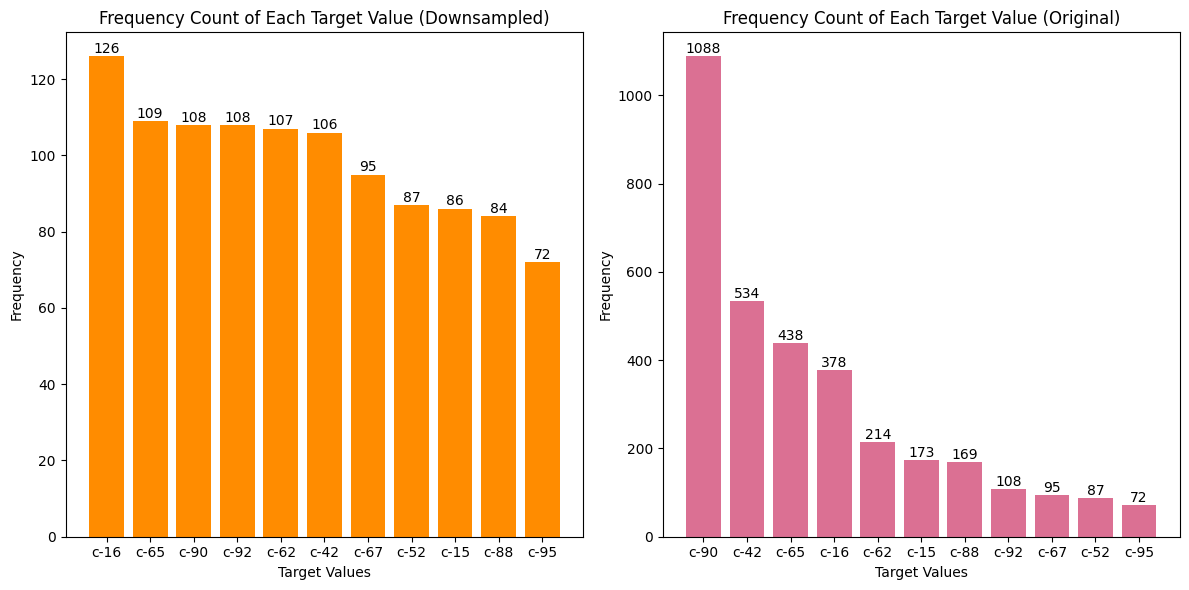

In [18]:
downsampled_target_uniqueCounts = downsampledData_original['target'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the downsampling bar plot in the first subplot
axs[0].bar(downsampled_target_uniqueCounts.index, downsampled_target_uniqueCounts.values, color='darkorange')

for i, v in enumerate(downsampled_target_uniqueCounts.values):
    axs[0].text(i, v + 0.1, str(v), ha='center', va='bottom')

axs[0].set_xlabel('Target Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Frequency Count of Each Target Value (Downsampled)')

# Plot the original bar plot in the second subplot
axs[1].bar(target_uniqueCounts.index, target_uniqueCounts.values, color='palevioletred')

for i, v in enumerate(target_uniqueCounts.values):
    axs[1].text(i, v + 0.1, str(v), ha='center', va='bottom')

axs[1].set_xlabel('Target Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Frequency Count of Each Target Value (Original)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


**Step 2: Upweight the downsampled classes.**

Since we downsampled class 'c-90' by a factor of 10, we will apply that factor as respective weight contribution to each instance of class 'c-90' during training. So each retained observations will now get higher improtance weight (originally 1). This compensates for the number of instances got taken out, ensuring that the model pays more attention to the instances that are still present. We will apply this during model fit using downsamplingFactors dictionary.

###**Preprocess training data again using downsampled data.**
####After downsampling data, we have 1088 observations for training.

In [19]:
#Shuffle downsample data so that all class observations does not stay in one chunk.
from sklearn.utils import shuffle
downsampledData_original = shuffle(downsampledData_original, random_state=1997).reset_index(drop=True)
downsampledData_original.head()

,f-1-1,f-1-2,f-1-3,f-1-4,f-1-5,f-1-6,f-1-7,f-1-8,f-1-9,f-1-10,...,f-6-28,f-6-29,f-6-30,f-6-31,f-6-32,f-6-33,f-6-34,f-6-35,f-6-36,target
0,14.22200,14.796000,11.6640,6.6927,0.85846,-5.2883,-9.6013,-8.6243,-1.4164,7.4397,...,-37.630,-54.3150,51.063,38.795,-13.5700,8.9185,-20.8350,9.9709,32.9330,c-90
1,46.67800,0.058307,-24.4890,-1.6533,-20.84400,-12.5140,2.4956,-14.9210,30.5040,62.9210,...,28.462,143.0900,107.700,144.880,197.4800,137.3100,12.4350,-62.4110,-47.0870,c-92
2,-351.80000,-246.450000,-68.8870,115.9900,-17.90500,67.4700,-357.2100,-188.8200,-12.4270,-392.7500,...,-1202.400,259.5200,-1278.200,-955.660,-1180.7000,1497.0000,-1250.1000,162.9500,-2004.4000,c-92
3,35.43700,10.602000,-18.0880,-29.5470,-15.36200,12.6060,31.0430,23.1970,-8.3821,-44.3100,...,-73.339,-86.0030,-80.154,-34.080,15.4100,25.1430,6.7423,-5.9423,-4.5425,c-42
4,-0.70748,2.801000,-2.9829,139.6100,37.87300,31.2210,30.6750,20.9410,15.6600,17.4350,...,10.195,-7.3103,-42.859,10.855,8.5097,-3.7746,-1.4952,8.2995,7.4632,c-67


In [20]:
downsampledTarget = downsampledData_original['target']
#Get unique target values.
downsampled_uniqueTargets = downsampledData_original['target'].unique()
#Sort unique values and create a mapping. For example, 'c-15' --> 0, 'c-16' --> 1, and so on.
downsampled_targetInteger = {target: index for index, target in enumerate(sorted(downsampled_uniqueTargets))}
print(f'Target original values - converted integers: {downsampled_targetInteger}')
#Replace with new integer values.
downsampledTarget = downsampledTarget.map(downsampled_targetInteger)
#Reshape the new integer-target column (to (-1, 1)) to ensure a numpy column vector/array.
downsampledTarget = downsampledTarget.values.reshape(-1,1)
print(f'Shape of downsample target columns: {downsampledTarget.shape}')
print('Interger downsample target column:')
print(downsampledTarget)

Target original values - converted integers: {'c-15': 0, 'c-16': 1, 'c-42': 2, 'c-52': 3, 'c-62': 4, 'c-65': 5, 'c-67': 6, 'c-88': 7, 'c-90': 8, 'c-92': 9, 'c-95': 10}
Shape of downsample target columns: (1088, 1)
Interger downsample target column:
[[8]
 [9]
 [9]
 ...
 [2]
 [5]
 [5]]


In [21]:
downsampledData = downsampledData_original.drop(columns=['target'])
#Reshape data.
timeSteps = 6
features = 36
#Get Numpy representation of the training data.
downsampled_X = downsampledData.values
#Reshape the predictors.
downsampled_X = downsampled_X.reshape(-1, timeSteps, features)
print(f'Training data - after reshape: {downsampled_X.shape}')
print(f'First row/observation shape: {downsampled_X[0].shape}')

Training data - after reshape: (1088, 6, 36)
First row/observation shape: (6, 36)


In [22]:
#80% for training, 20% for validation.
trainSize = 0.8
downsampled_trainIndex = int(len(downsampled_X) * trainSize)

downsampled_xTrain, downsampled_xValidation = downsampled_X[:downsampled_trainIndex], downsampled_X[downsampled_trainIndex:]
downsampled_targetTrain, downsampled_targetValidation = downsampledTarget[:downsampled_trainIndex], downsampledTarget[downsampled_trainIndex:]

print('After split:')
print("X Train shape:", downsampled_xTrain.shape)
print("Target Train shape:", downsampled_xValidation.shape)
print("X Validation shape:", downsampled_targetTrain.shape)
print("Target Validation shape:", downsampled_targetValidation.shape)

After split:
X Train shape: (870, 6, 36)
Target Train shape: (218, 6, 36)
X Validation shape: (870, 1)
Target Validation shape: (218, 1)


###**Build the model.**
###**1st model gives score 1.56173**

In [23]:
#Set seed to get consistent results.
tf.random.set_seed(1997)

In [24]:
#Get input shape.
inputShape = xTrain.shape[1:]
#Normalization to preprocess xTrain data before feeding to the model.
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(xTrain)

In [25]:
#Sequential model
model = keras.Sequential()
#Add the normalization layer
model.add(normalizer)

#Bidirectional LSTM layer with 32 units.
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True), input_shape=inputShape))
model.add(tf.keras.layers.Dropout(0.2))

#Bidirectional GRU layer with 96 units.
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(96, return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))

#SimpleRNN layer with 96 units.
model.add(tf.keras.layers.SimpleRNN(96, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

#Bidirectional LSTM layer with 32 units.
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.25))
#Output layer with softmax activation for classification.
model.add(tf.keras.layers.Dense(11, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, None, 36)          73        
 on)                                                             
                                                                 
 bidirectional (Bidirection  (None, None, 64)          17664     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 192)         93312     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, None, 192)         0         
                                                        

In [26]:
history = model.fit(xTrain, targetTrain, epochs=10, validation_data=(xValidation, targetValidation))

Epoch 1/10
84/84 [==============================] - 23s 69ms/step - loss: 2.0001 - accuracy: 0.3454 - val_loss: 1.7296 - val_accuracy: 0.4256
Epoch 2/10
84/84 [==============================] - 3s 34ms/step - loss: 1.7693 - accuracy: 0.3957 - val_loss: 1.6923 - val_accuracy: 0.4479
Epoch 3/10
84/84 [==============================] - 5s 57ms/step - loss: 1.7127 - accuracy: 0.4136 - val_loss: 1.6870 - val_accuracy: 0.4256
Epoch 4/10
84/84 [==============================] - 4s 49ms/step - loss: 1.7077 - accuracy: 0.4028 - val_loss: 1.6877 - val_accuracy: 0.4256
Epoch 5/10
84/84 [==============================] - 3s 33ms/step - loss: 1.6645 - accuracy: 0.4154 - val_loss: 1.6529 - val_accuracy: 0.4256
Epoch 6/10
84/84 [==============================] - 3s 33ms/step - loss: 1.5962 - accuracy: 0.4344 - val_loss: 1.6004 - val_accuracy: 0.4568
Epoch 7/10
84/84 [==============================] - 3s 34ms/step - loss: 1.5619 - accuracy: 0.4531 - val_loss: 1.5892 - val_accuracy: 0.4435
Epoch 8/10
8

###**1st Model Visualize training.**

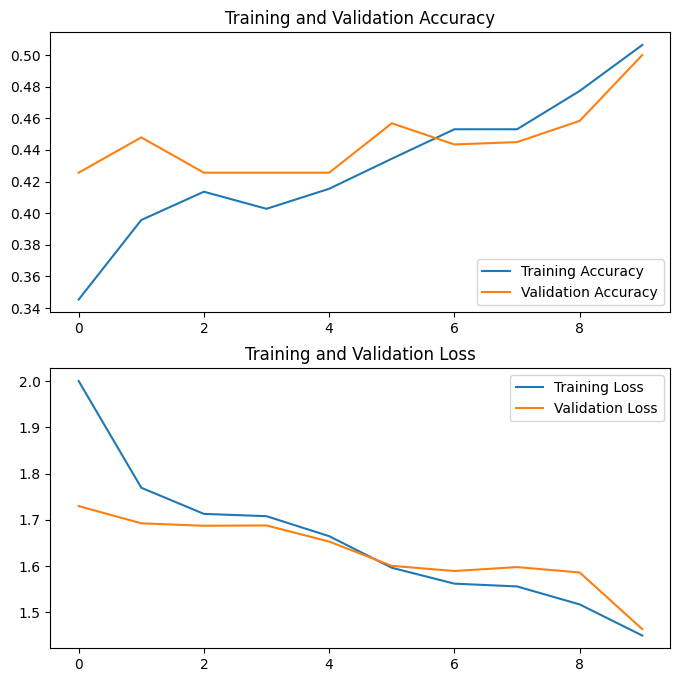

In [27]:
trainAccuracy = history.history['accuracy']
validationAccuracy = history.history['val_accuracy']

trainLoss = history.history['loss']
validationLoss = history.history['val_loss']

epochsRange = range(len(trainAccuracy))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochsRange, trainAccuracy, label='Training Accuracy')
plt.plot(epochsRange, validationAccuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochsRange, trainLoss, label='Training Loss')
plt.plot(epochsRange, validationLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###**2nd model gives score 1.49**

In [28]:
#Sequential model
model1 = keras.Sequential()
model1.add(normalizer)

#Bidirectional LSTM layer with 512 units.
model1.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True), input_shape=inputShape))
model1.add(tf.keras.layers.Dropout(0.1))

#SimpleRNN layer with 64 units.
model1.add(tf.keras.layers.SimpleRNN(64, return_sequences=True))
model1.add(tf.keras.layers.Dropout(0.1))

#Bidirectional GRU layer with 32 units.
model1.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)))
model1.add(tf.keras.layers.Dropout(0.1))

#SimpleRNN layer with 64 units.
model1.add(tf.keras.layers.SimpleRNN(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.1))

#LSTM layer with 512 units.
model1.add(tf.keras.layers.LSTM(512))
model1.add(tf.keras.layers.Dropout(0.1))

model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.25))

model1.add(tf.keras.layers.Dense(11, activation='softmax'))

model1.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, None, 36)          73        
 on)                                                             
                                                                 
 bidirectional_3 (Bidirecti  (None, None, 1024)        2248704   
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, None, 1024)        0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 64)          69696     
                                                                 
 dropout_6 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 64)         

In [29]:
history1 = model1.fit(xTrain, targetTrain, epochs=10, batch_size=16, validation_data=(xValidation, targetValidation))

Epoch 1/10
168/168 [==============================] - 79s 375ms/step - loss: 1.9664 - accuracy: 0.3454 - val_loss: 1.8264 - val_accuracy: 0.3661
Epoch 2/10
168/168 [==============================] - 55s 325ms/step - loss: 1.8078 - accuracy: 0.3867 - val_loss: 1.7974 - val_accuracy: 0.3884
Epoch 3/10
168/168 [==============================] - 67s 400ms/step - loss: 1.6988 - accuracy: 0.4225 - val_loss: 1.5717 - val_accuracy: 0.4494
Epoch 4/10
168/168 [==============================] - 53s 315ms/step - loss: 1.6441 - accuracy: 0.4471 - val_loss: 1.5661 - val_accuracy: 0.4554
Epoch 5/10
168/168 [==============================] - 54s 324ms/step - loss: 1.5842 - accuracy: 0.4575 - val_loss: 1.4681 - val_accuracy: 0.4955
Epoch 6/10
168/168 [==============================] - 55s 329ms/step - loss: 1.5260 - accuracy: 0.4836 - val_loss: 1.4997 - val_accuracy: 0.4717
Epoch 7/10
168/168 [==============================] - 54s 324ms/step - loss: 1.4768 - accuracy: 0.5019 - val_loss: 1.4751 - val_ac

###**2nd Model Visualize training. --> BEST MODEL**

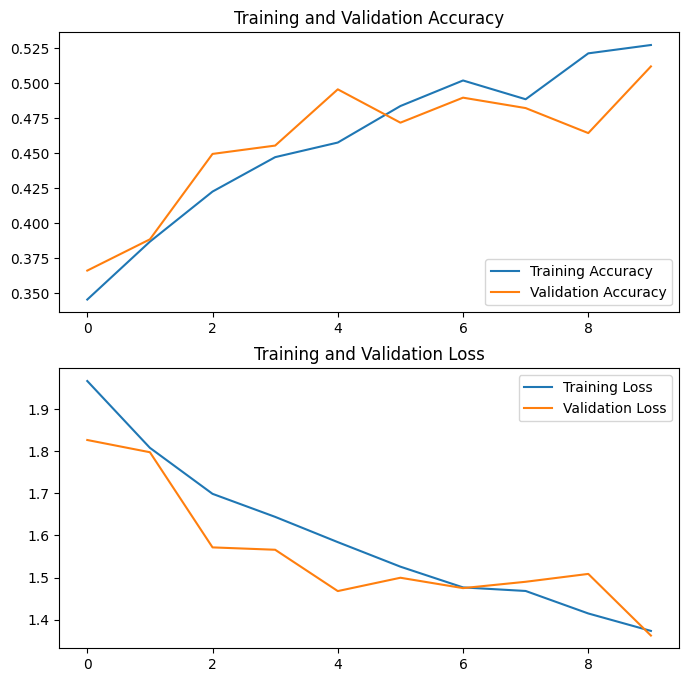

In [30]:
trainAccuracy = history1.history['accuracy']
validationAccuracy = history1.history['val_accuracy']

trainLoss = history1.history['loss']
validationLoss = history1.history['val_loss']

epochsRange = range(len(trainAccuracy))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochsRange, trainAccuracy, label='Training Accuracy')
plt.plot(epochsRange, validationAccuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochsRange, trainLoss, label='Training Loss')
plt.plot(epochsRange, validationLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####**3rd model with Further/Advanced Development: Automatic Hyper parameters tuning.**

####Train on down sampling data.

In [31]:
#Get input shape.
downsampled_inputShape = downsampled_xTrain.shape[1:]
#Normalization to preprocess xTrain data before feeding to the model.
downsampled_normalizer = tf.keras.layers.Normalization()
downsampled_normalizer.adapt(downsampled_xTrain)
upWeight = {0: 2.0, 1: 3.0, 2: 5.0, 3: 1.0, 4: 2.0, 5: 4.0, 6: 1.0, 7: 2.0, 8: 10.0, 9: 1.0, 10: 1.0}

#classInterger = {'c-15': 0, 'c-16': 1, 'c-42': 2, 'c-52': 3, 'c-62': 4, 'c-65': 5, 'c-67': 6, 'c-88': 7, 'c-90': 8, 'c-92': 9, 'c-95': 10}
#downsamplingFactors = {'c-90': 10, 'c-42': 5, 'c-65': 4, 'c-16': 3, 'c-62': 2, 'c-15': 2, 'c-88': 2, 'c-92': 1, 'c-67': 1, 'c-52': 1, 'c-95': 1}

In [32]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.5 MB/s eta 0:00:00


In [33]:
#Using Keras Tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter

<ipython-input-33-9a32dc6b6a04>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [34]:
def automatic_hyperModel(hp):
    '''Function to apply automatic hyperparameters tuning using Keras Tuner.'''
    model = keras.Sequential()
    model.add(downsampled_normalizer)

    #Stack recurrent layers.
    model.add(keras.layers.Bidirectional(keras.layers.LSTM(hp.Int('lstm_filters', min_value=32, max_value=512, step=32), return_sequences=True, input_shape=downsampled_inputShape)))
    model.add(keras.layers.SimpleRNN(hp.Int('rnn_filters', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(keras.layers.LSTM(hp.Int('lstm_filters', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(keras.layers.LSTM(hp.Int('lstm_filters', min_value=32, max_value=512, step=32)))
    model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(11, activation='softmax'))

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

#Initiate Keras Tuner.
kerasTuner = RandomSearch(
    automatic_hyperModel,
    objective='val_accuracy',
    max_trials=10,
    directory='Hyperparameter_Tuning',
    project_name='Auto_Tuning',
    overwrite=True)

#Perform hyperparameter search.
kerasTuner.search(downsampled_xTrain, downsampled_targetTrain, epochs=10, batch_size=8, validation_data=(downsampled_xValidation, downsampled_targetValidation), class_weight = upWeight)

#Get the best hyperparameters.
bestHypers = kerasTuner.get_best_hyperparameters(num_trials=1)[0]
#Build the model with the best hyperparameters.
bestModel = kerasTuner.hypermodel.build(bestHypers)

#Train the best model.
bestModel.fit(downsampled_xTrain, downsampled_targetTrain, epochs=10, batch_size=8, validation_data=(downsampled_xValidation, downsampled_targetValidation), class_weight = upWeight)

Trial 10 Complete [00h 01m 00s]
val_accuracy: 0.1651376187801361

Best val_accuracy So Far: 0.26146790385246277
Total elapsed time: 00h 25m 26s
Epoch 1/10
109/109 [==============================] - 19s 73ms/step - loss: 6.6100 - accuracy: 0.1322 - val_loss: 2.4965 - val_accuracy: 0.1055
Epoch 2/10
109/109 [==============================] - 3s 32ms/step - loss: 5.9317 - accuracy: 0.1632 - val_loss: 2.3948 - val_accuracy: 0.1514
Epoch 3/10
109/109 [==============================] - 4s 34ms/step - loss: 5.7651 - accuracy: 0.2057 - val_loss: 2.4025 - val_accuracy: 0.1606
Epoch 4/10
109/109 [==============================] - 5s 44ms/step - loss: 5.7257 - accuracy: 0.2034 - val_loss: 2.3727 - val_accuracy: 0.1330
Epoch 5/10
109/109 [==============================] - 5s 46ms/step - loss: 5.5538 - accuracy: 0.2195 - val_loss: 2.4297 - val_accuracy: 0.2248
Epoch 6/10
109/109 [==============================] - 3s 32ms/step - loss: 5.6244 - accuracy: 0.2356 - val_loss: 2.4491 - val_accuracy: 0.13

In [35]:
bestHPs = kerasTuner.get_best_hyperparameters()[0]
print(f'Best hyper parameters combinations - using downsampled data: {bestHPs.values}')

Best hyper parameters combinations: {'lstm_filters': 128, 'rnn_filters': 96}


###**Test set prediction.**
####Reshaping.

In [36]:
timeSteps = 6
features = 36
#Get Numpy representation of the training data.
testValues = testData.values
#Reshape the predictors.
reshapedTest = testValues.reshape(-1, timeSteps, features)
print(f'Testing data - after reshape: {reshapedTest.shape}')
print(f'First row/observation shape: {reshapedTest[0].shape}')
print('First row/observation after reshape:')
print(reshapedTest[0])

Testing data - after reshape: (1439, 6, 36)
First row/observation shape: (6, 36)
First row/observation after reshape:
[[ 2.5575e+01  2.5565e+01  6.8052e+00 -2.6012e+01 -5.5129e+01 -6.2075e+01
  -4.3340e+01 -1.4265e+01  4.0360e+00  2.8128e+00 -8.5521e+00 -1.3780e+01
  -5.8363e+00  7.8838e+00  1.4671e+01  9.1151e+00 -3.0461e+00 -1.1722e+01
  -1.1658e+01 -5.3466e+00  1.5338e+00  6.3691e+00  1.1175e+01  1.8472e+01
   2.6396e+01  2.8901e+01  2.1583e+01  7.1927e+00 -5.7160e+00 -1.0395e+01
  -7.9049e+00 -5.0269e+00 -6.5418e+00 -1.0482e+01 -1.1175e+01 -6.4459e+00]
 [-1.4164e+01 -9.6159e+00 -1.6583e+00  4.1875e+00  4.8662e+00  2.0116e+00
  -4.0022e-01 -1.0631e-01  1.8009e+00  2.8291e+00  1.9516e+00  2.1457e-01
  -1.0081e+00 -1.5038e+00 -1.6574e+00 -1.0602e+00  1.2660e+00  4.8539e+00
   6.7407e+00  3.7877e+00 -3.0299e+00 -6.8525e+00  1.3166e+00  2.5469e+01
   5.9903e+01  9.1313e+01  1.0648e+02  9.9928e+01  7.6338e+01  4.6671e+01
   2.1580e+01  6.5167e+00  8.6622e-01  4.8460e-01  1.1933e+00  9.67

###Make prediction.

In [41]:
resultDict = {} #Dictionary to store predictions (keyed by row index)
pred = model1.predict(reshapedTest)
for i, prediction in enumerate(pred):
  resultDict[i] = prediction
print (f'Success, {len(resultDict)} test instances predicted.')

45/45 [==============================] - 14s 111ms/step
Success, 1439 test instances predicted.


###**Write prediction to a CSV file.**

In [42]:
import csv

csvFile = 'Prediction.csv'
with open(csvFile, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')

    #Write header.
    columnNames = ['ID', 'c-15', 'c-16', 'c-42', 'c-52', 'c-62', 'c-65', 'c-67', 'c-88', 'c-90', 'c-92', 'c-95']
    csvwriter.writerow(columnNames)

    #Write each row as a list.
    for rowIndex, prediction in resultDict.items():
        row = [rowIndex] + [f'{num:.9f}' for num in prediction]
        csvwriter.writerow(row)

print(f'Predictions successfully saved to {csvFile}')

Predictions successfully saved to Prediction.csv
